<!-- If this looks like a bunch of HTML markdown text, you have to go to Kernel -> Restart & Run All -->
# EIEIOO Python Workshop Notebook

Welcome to the Jupyter notebook for the Python workshop! Each cell is run individually. While the cell is running, you will see the [*] symbol beside each cell. 
<br>
Useful keyboard shortcuts:
1. Run a cell: Ctrl+Enter
2. Add a cell below selected cell: b
3. Add a cell above selected cell: a

Please ask questions if you are stuck at any part during the workshop!

## Part 1: Import libraries and data

The first step to running any python code is importing the relevant libraries you will need to use. For this workshop, you will use the following:
1. NumPy - used for mathematical operations, also has many other useful functions for a variety of applications.
2. Matplotlib - used for plotting data and displaying nice-looking graphs.  
3. SciPy - used for scientific computing.

Links for the documentation of these libraries are listed below:
<br>
[NumPy Documentation](https://numpy.org/doc/stable/index.html)
<br>
[Matplotlib Documentation](https://matplotlib.org/stable/)
<br>
[SciPy Documentation](https://docs.scipy.org/doc/scipy/)
<br>
<br>
Each library must be imported into the notebook. The syntax to import a library is: 
```python
import library_name as abbreviated_library_name
```
The abbreviation is how the library will be referenced throughout the rest of the notebook. To only import certain functions from a library, use:
```python
from library_name import function_name
```
An example of this is: 
```python
import numpy as np
```
**Now in the following cell, import numpy, matplotlib.pyplot, and curve_fit from scipy.optimize.** 

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import curve_fit

In [2]:
# Graph settings
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'serif'

# Making the data

In [3]:
# Make data distribution from scipy.stats (this will be their data to work with)
# exp_dist = expon(scale=1.0)

# sample_data = exp_dist.rvs(size=10000)
# x_pts = np.linspace(0,20,10000)

In [4]:
# Histogram of samples
# plt.title('Generated exponential distribution with PDF')

# plt.hist(sample_data, bins=100, density=True)
# plt.plot(x_pts, exp_dist.pdf(x_pts), label='Exponential Data PDF')

# plt.xlabel('Input sample data')
# plt.ylabel('Samples per bin')
# plt.legend()
# plt.show()

In [5]:
# Randomly generate points for fit line
# vert_shifts = np.random.normal(loc=3.3, scale=0.1, size=10000)
# y_pts = exp_dist.pdf(x_pts) + vert_shifts

In [6]:
# Checking 2d histogram
# plt.title('Random points about exponental distribution')

# plt.hist2d(x_pts, y_pts, [150,150])

# plt.xlabel('x Input')
# plt.ylabel('y Output')
# plt.colorbar()
# plt.show()

In [7]:
# Checking plot
# plt.title('Histogram of output')

# plt.hist(y_pts, bins=100, density=True)

# plt.xlabel('Output sample data')
# plt.ylabel('Samples per bin')
# plt.show()

In [8]:
# sample_data = np.load('sample_data.npy')
# time = sample_data[0]
# signal_ampl = sample_data[1]

In [9]:
# Save the data arrays
# np.savetxt('sample_data.txt', np.transpose([time, signal_ampl]))

In [10]:
# Download the data from ?? 

**Import the data 'sample_data.txt' using np.loadtxt().**
<br>
To check the shape of the data, you can use np.shape(). This data represents the decay rate of a radioactive source as a function of time with background noise present at lower rates. The first column is time in seconds, and the second is the decay rate in Curies. 

In [11]:
# Import the data
sample_data = np.loadtxt('sample_data.txt')
print(np.shape(sample_data))

time = sample_data[:,0]
rates = sample_data[:,1]

(10000, 2)


## Part 2: 1d Histogram Analysis

**Plot the decay rates in a 1d histogram.**
<br>
Histograms are a convenient way to check the distribution of data and can be used to see if there are any apparent trends. 
 Be sure to include a title and axis labels with units, and choose an appropriate number of bins.

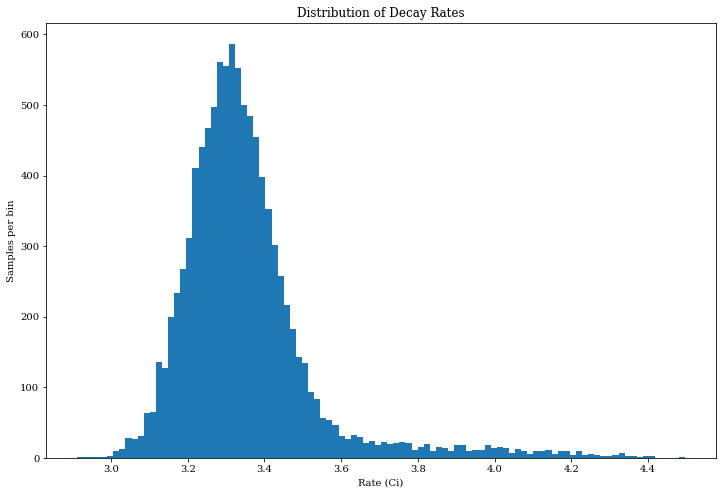

In [12]:
# Checking plots
# Histogram of samples
plt.title('Distribution of Decay Rates')

h_1d_output = plt.hist(rates, bins=100)

plt.xlabel('Rate (Ci)')
plt.ylabel('Samples per bin')
plt.show()

What kind of shape does the data have? Is it Gaussian, exponential, or skewed?  
**Fit a function to the rate data in the histogram using scipy.curve_fit.**
<br>
The function can be defined as:
```python
def function_name(variables):
    return function_equation
```
Alternatively, you can use the functions from scipy.stats. The syntax for using curve_fit is:
```python
fit = curve_fit(function_name, x, y, p0=[])
```
When using curve_fit, you must pass guesses for the parameters of the function you are fitting, where p0 is the list of the parameter guesses. Note that the fit is very sensitive to these initial guesses, so try to make them as close as possible to what you see in the data. The parameters found will be returned in the first array of the fit. The fit can be printed using a print statement to see what parameters were found. Further documentation can be found at:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [13]:
# Let's do a Gaussian fit of the y_outputs
def gaussian(x, A, sigma, mu):
    return A*(1/(sigma * np.sqrt(2*np.pi)) * np.exp(-1*(x - mu)**2 / (2*sigma**2)))

x_1d_fit = (h_1d_output[1][:-1]+h_1d_output[1][1:])/2
y_1d_fit = h_1d_output[0]

fit = curve_fit(gaussian, x_1d_fit, y_1d_fit, p0 = [3.5, 0.2, 3.3])
print (fit)

(array([1.48653993e+02, 1.06896455e-01, 3.31255224e+00]), array([[ 1.80877680e+00,  8.67136654e-04, -5.26015094e-09],
       [ 8.67136654e-04,  1.24710871e-06, -7.37304431e-12],
       [-5.26015094e-09, -7.37304431e-12,  1.24708375e-06]]))


**Plot the fit along with the histogram in order to see the strength of the fit.**
<br>
The previous histogram plot can be copied to this cell. Now you must add a plot that shows the fit function. To do this, you can generate the x-input as an array of numbers using np.linspace() or np.arange(). For the y-output, the x-input and fit parameters must be plugged into the fit function. Then, it can be plotted with plt.plot().

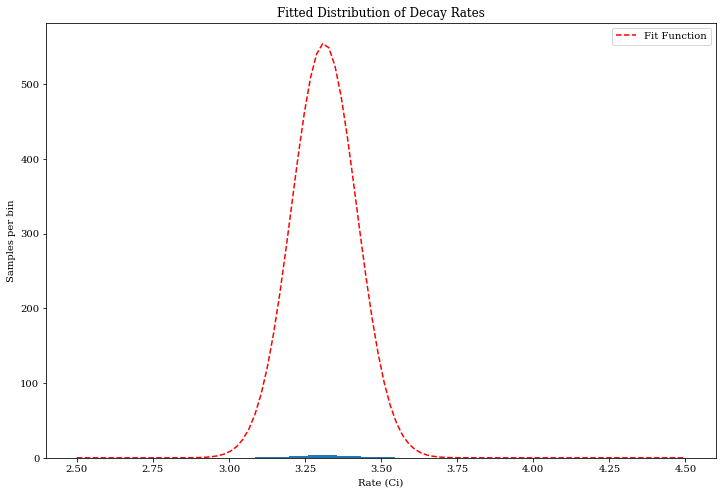

In [14]:
# Checking fit - add cutting data to improve fit?
plt.title('Fitted Distribution of Decay Rates')

plt.hist(rates, bins=100, density=True)

x_plot = np.linspace(2.5,4.5, 100)

plt.plot(x_plot, gaussian(x_plot, *fit[0]), 'r--', label = 'Fit Function')

plt.xlabel('Rate (Ci)')
plt.ylabel('Samples per bin')
plt.legend()
plt.show()

## Part 3: 2d Histogram Analysis

**Let's use the full dataset and plot the decay rate as it changes in time as a 2d histogram.** 
<br>
Be sure to choose bins for x and y that show a good resolution of the data, and include a title and axis labels with units. plt.colorbar() can be added to the plot to show the number of counts in each bin. 

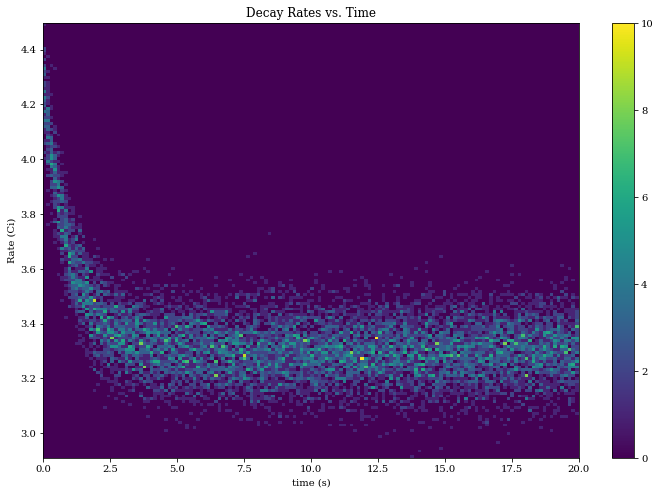

In [15]:
# Checking 2d histogram
plt.title('Decay Rates vs. Time')

plt.hist2d(time, rates, [150,150])

plt.xlabel('time (s)')
plt.ylabel('Rate (Ci)')
plt.colorbar()
plt.show()

As you can probably see, there is a trend in the rate as it changes in time. In order to better describe this trend, another fit must be completed. However, this time there is 2-dimensional data so the fit will have to be done differently. **To model this, find the average decay rate every 1 second.** This can be done by using a for/while loop and iterating in time every one second. Note that in your loop you will need to store both the average rate and time for each point. There are a number of different ways to approach this problem, so there is no one correct way to do it! 

In [16]:
# Let's find the avg rate every [step_size] s
i = 0
step_size = 1
time_pts = []
avg_rate_pts = []

# For uncertainties
min_rate_pts = []
max_rate_pts = []

while(i<max(time)):
    time_pt = i
    time_cut = (time>i) & (time<i+step_size)
    
    min_rate_pt = np.min(rates[time_cut])
    max_rate_pt = np.max(rates[time_cut])
    avg_rate = np.mean(rates[time_cut])
    
    time_pts.append(time_pt)
    min_rate_pts.append(min_rate_pt)
    max_rate_pts.append(max_rate_pt)
    avg_rate_pts.append(avg_rate)
    
    i+=step_size


**Plot the average decay points on the 2d histogram.**
<br>
To make the points more visible, you may have to adjust the size and color of the points using parameters added after the x and y input of plt.plot() called keyword arguments. A description of keyword arguments are listed on this page:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

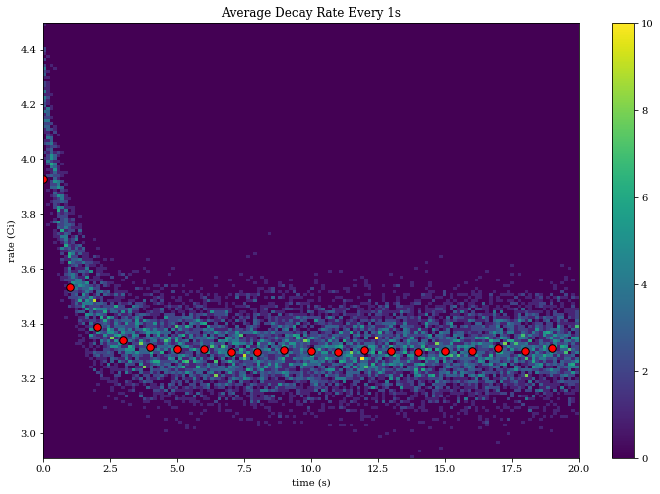

In [17]:
# Checking avg pts
plt.title('Average Decay Rate Every 1s')

plt.hist2d(time, rates, [150,150])

plt.plot(time_pts, avg_rate_pts, 'r.', ms=15, mec='black')

plt.xlabel('time (s)')
plt.ylabel('rate (Ci)')
plt.colorbar()
plt.show()

**Find the uncertainty in the decay rate on each point.** 
<br>
We will assume uniform uncertainty in both +/- directions. Since each point is a mean value, it's uncertainty according to error propegation would be: 
<br>
<div align="center">$Uncertainty = \frac{max-min}{2}$</div>
<br>
The max and min are the maximum and minimum value of the decay rate within each one second calculation window.

**Plot the uncertainties with the points along with the 2d histogram using plt.errorbar().**
<br>
The yerr argument of plt.errorbar() will be the uncertainties you have calculated, and the argument is an array-type. 

In [18]:
# Propegate uncertainty of the mean as (1/2)*(max-min)
# Will require previous loop to be modified

Unc_pts = []

for i in range(len(max_rate_pts)):
    Unc_pt = 0.5*(max_rate_pts[i]-min_rate_pts[i])
    
    Unc_pts.append(Unc_pt)

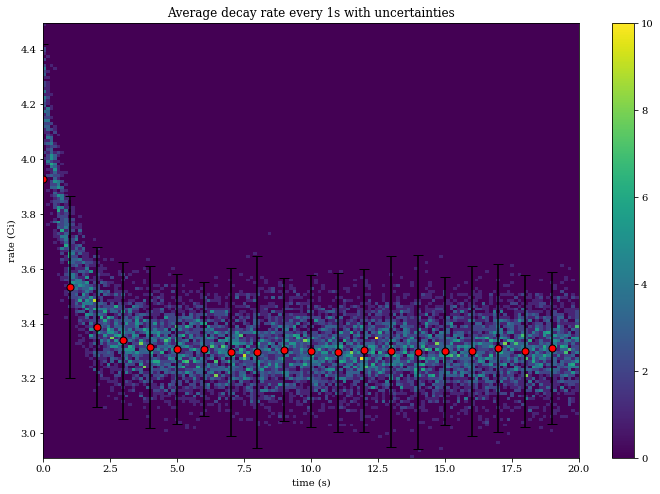

In [19]:
# Plotting with uncertainties
plt.title('Average decay rate every 1s with uncertainties')

plt.hist2d(time, rates, [150,150])

plt.errorbar(time_pts, avg_rate_pts, yerr=Unc_pts, 
             fmt='o', capsize=5, ecolor='black', ms=7, color='red', markeredgecolor='black')

plt.xlabel('time (s)')
plt.ylabel('rate (Ci)')
plt.colorbar()
plt.show()

Now we can finally fit an exponential function to the points! **Define a function that describes the trend in the data and fit to it in the same way as before using curve_fit. Add the fit to the plot.**

In [20]:
# Fit an exponential to the points
def exponential_fn(x, shift, A):
    return shift + A*np.exp(-x)

x_fit = time_pts
y_fit = avg_rate_pts

fit = curve_fit(exponential_fn, x_fit, y_fit, p0 = [3.3, 0.2])
print (fit)

(array([3.30209543, 0.62678829]), array([[ 1.28931721e-06, -1.76363059e-06],
       [-1.76363059e-06,  2.22965426e-05]]))


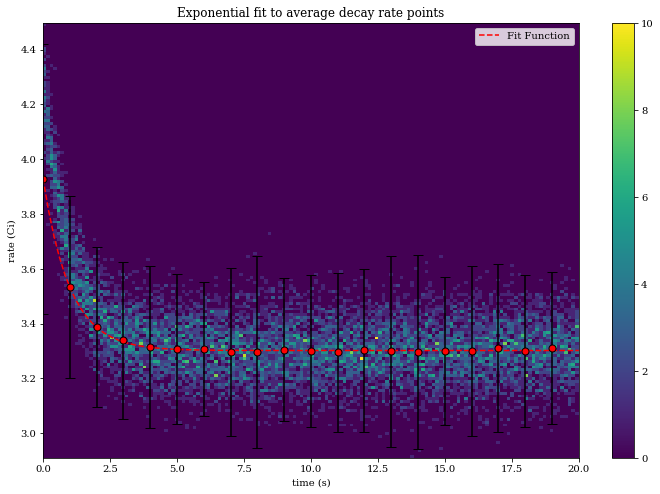

In [21]:
# Plotting with exp fit
plt.title('Exponential fit to average decay rate points')

plt.hist2d(time, rates, [150,150])

plt.errorbar(time_pts, avg_rate_pts, yerr=Unc_pts, 
             fmt='o', capsize=5, ecolor='black', ms=7, color='red', markeredgecolor='black')

xpoints=np.linspace(0, 20, 100)
plt.plot(xpoints, exponential_fn(xpoints, *fit[0]), 'r--', label = 'Fit Function')

plt.xlabel('time (s)')
plt.ylabel('rate (Ci)')
plt.colorbar()
plt.legend()
plt.show()

In [22]:
# Using scipy stats